# **Red Neuronal Artificial: PERCEPTRÓN**
```
Alumno : Pfoccori Quispe Alex Harvey
Codigo: 193837
Proposito : Red Neuronal Artificial (Perceptron) en el problema de evento de diabetes
```

# **Breve marco teórico**
**Definición del perceptrón:**

El perceptrón es una red neuronal de aprendizaje supervisado que consiste en una única capa de neuronas, donde cada neurona realiza una combinación lineal de las entradas ponderadas por los pesos y aplica una función de activación para producir una salida binaria. El perceptrón es capaz de aprender a clasificar datos en dos categorías distintas, ajustando los pesos y el sesgo mediante la retropropagación del error.

**Proceso de entrenamiento del perceptrón:**

El proceso de entrenamiento del perceptrón implica la presentación de datos de entrenamiento de forma iterativa. Para cada muestra de entrenamiento, se realiza la propagación hacia adelante para calcular la salida del perceptrón. Luego, se calcula el error entre la salida obtenida y la salida deseada. Este error se utiliza para ajustar los pesos y el sesgo mediante la retropropagación del error y la actualización de los parámetros. El proceso de entrenamiento continúa iterando sobre los datos de entrenamiento durante un número determinado de épocas, refinando gradualmente los pesos y el sesgo del perceptrón para mejorar su capacidad de clasificación.

# **1. IMPORTACIÓN DE LIBRERÍAS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# **2. IMPLEMENTACIÓN DE PERCEPTRÓN**



In [2]:
class Perceptron:
    # Contructor de la clase
    def __init__(self, N):
        # Inicialización de los pesos aleatorios
        self.W = np.random.randn(N)
        # Inicializacion del sesgo (umbral) aleatorio
        self.Teta = random.random()
        # Guardar el número de características (atributos)
        self.N = N
        #Inicializacion de las metricas de evaluacion del modelo (matriz de confuscion)
        self.MC = {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0}

    # Funcion de activaciion sigmoide
    def ActivacionSigmoide(self, X):
        return 1 / (1 + math.exp(-X))
    
    # Funcion de activacion escalon
    def ActivacionEscalon(self, X):
        if (X < 0.5):
            return 0
        else:
            return 1
    
    # Prediccion del perceptron
    def Prediccion(self, Entradas):
        # Calculo de la combinacion lineal de las entradas y los pesos, y ajuste
        WX = self.W.dot(Entradas) - self.Teta
        # Aplicacion de la funcion de activacion sigmoide a la combinacion lineal
        self.Y = self.ActivacionSigmoide(WX)
        # Almacenamiento de las entradas para uso posterior
        self.X = Entradas
        # Aplicacion de la funcion de activacion escalon a la salida
        return self.ActivacionEscalon(self.Y)
    
    # Propagacion del perceptron
    def Propagacion(self, Entradas):
        # Calculo de la combinacion lineal de las entradas y los pesos, y ajuste
        WX = self.W.dot(Entradas) - self.Teta
        # Aplicacion de la funcion de activacion sigmoide a la combinacoin lieal
        self.Y = self.ActivacionSigmoide(WX)
        #Almacenamiento de las entradas para uso posterior
        self.X = Entradas
        # Devolucion de la salida
        return self.Y
    
    # Retropropagacion
    def RetroPropagacion(self, Alfa, D):
        # Actualizacion de los pesos del perceptron para cada caracteristica de en
        for i in range(0, self.N):
            self.W[i] = self.W[i] + Alfa * (D - self.Y) * self.X[i]
        # Actualizacion del sesgo del preceptron
        self.Teta = self.Teta - Alfa * (D - self.Y)

    # Entrenamiento del perceptron
    def Entrenar(self, datos, Epocas, Alfa):
        # Bucle principal para el entrenamiento durante un numero determinado
        for k in range(Epocas):
            # Bucle intenrno para recorrer los datos de entrenamiento
            for i in range(len(datos)):
                # Propagacion de la entrada a traves del perceptron
                self.Propagacion(datos[i, 0:self.N])
                # Retropropagacion del error y actualizacion de los pesos y sesgo
                self.RetroPropagacion(Alfa, datos[i, self.N])
        # Devolucion de los pesos y el sesgo entrenados
        return self.W, self.Teta
    
    # Test del modelo, retorna la matriz de confusion
    def Test(self, datos):
        self.MC = {'VP': 0, 'VN': 0, 'FP': 0, 'FN': 0}
        for dato in datos:
            # Realizar la prediccion
            Pred = self.Prediccion(dato[0: self.N])
            # Compara la prediccion con la etiqueta real y actualizacion de la matriz de confusion
            if ((dato[self.N] == Pred) and dato[self.N] == 1):
                self.MC['VP'] = self.MC['VP'] + 1
            elif ((dato[self.N] == Pred) and dato[self.N] == 0):
                self.MC['VN'] = self.MC['VN'] + 1
            elif ((Pred == 1) and (dato[self.N] == 0)):
                self.MC['FP'] = self.MC['FP'] + 1
            elif ((Pred == 0) and (dato[self.N] == 1)):
                self.MC['FN'] = self.MC['FN'] + 1
        # Devolucion de la matriz de confusion
        return self.MC
    
    # Calculo de la exactitud del modelo
    def Exactitud(self):
        return (self.MC['VP'] + self.MC['VN']) / (self.MC['VP'] + self.MC['VN'] + self.MC['FP'] + self.MC['FN'])

# **3. IMPORTACIÓN DE DATOS**

In [4]:
datos = pd.read_csv("diabetes.csv", sep=',')
datos.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# **4. CONVERSIÓN DE DATOS CATERGÓRICOS A NUMERICOS**

In [5]:
def Categorico_a_numerico(atributo):
    # Convertir el atributo al tipo categorico
    atributo = atributo.astype('category')
    # Convertir el atributo categorico a numerico
    return atributo.astype('category').cat.codes

In [6]:
# Convertir los datos categoricos a numerico
datos['Gender'] = Categorico_a_numerico(datos['Gender'])
datos['Polyuria'] = Categorico_a_numerico(datos['Polyuria'])
datos['Polydipsia'] = Categorico_a_numerico(datos['Polydipsia'])
datos['sudden weight loss'] = Categorico_a_numerico(datos['sudden weight loss'])
datos['weakness'] = Categorico_a_numerico(datos['weakness'])
datos['Polyphagia'] = Categorico_a_numerico(datos['Polyphagia'])
datos['Genital thrush'] = Categorico_a_numerico(datos['Genital thrush'])
datos['visual blurring'] = Categorico_a_numerico(datos['visual blurring'])
datos['Itching'] = Categorico_a_numerico(datos['Itching'])
datos['Irritability'] = Categorico_a_numerico(datos['Irritability'])
datos['delayed healing'] = Categorico_a_numerico(datos['delayed healing'])
datos['partial paresis'] = Categorico_a_numerico(datos['partial paresis'])
datos['muscle stiffness'] = Categorico_a_numerico(datos['muscle stiffness'])
datos['Alopecia'] = Categorico_a_numerico(datos['Alopecia'])
datos['Obesity'] = Categorico_a_numerico(datos['Obesity'])
datos['class'] = Categorico_a_numerico(datos['class'])

In [7]:
datos.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# **5. DISTRIBUCIÓN DE CLASES**

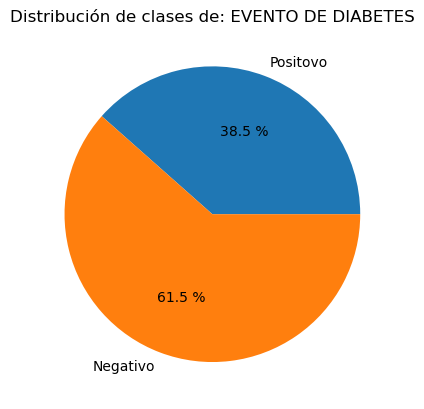

In [23]:
# vista gráfica de la distribución de clases
distribucion = datos.groupby('class').size()
plt.pie(distribucion, labels = ['Positovo','Negativo'], autopct="%0.1f %%")
plt.title('Distribución de clases de: EVENTO DE DIABETES')
plt.show()

# **6. NORMALIZACIÓN DE DATOS**

In [11]:
# Transformación por amplitud [0..1]
def Normalizacion_Amplitud(atributo):
    return (atributo - atributo.min()) / (atributo.max() - atributo.min())

# Normaliza todos los atributos del dataframe
def NormalizarTodo(datos):
    for col in datos.columns:
        datos[col] = Normalizacion_Amplitud(datos[col])
    return datos


In [12]:
datos = NormalizarTodo(datos)
datos.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.324324,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.567568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.337838,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
3,0.391892,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.594595,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **7. SEPARACIÓN DE DATOS PARA PRUEBA Y ENTRENAMIENTO**

In [13]:
# Separa datos para entrenamiento y test
def Separacion(datos, porcentaje_test = 0.25):
    data_test = datos.sample(frac=porcentaje_test)
    data_train = datos.drop(data_test.index)
    return data_train, data_test

In [14]:
train, test = Separacion(datos, 0.3)

# **8. ENTRENAMIENTO DE PERCEPTRÓN**

In [18]:
# El último atributo debe ser de SALIDA
# datos.shape[1]-1:  cantidad de atributos de entrada
RNA = Perceptron(datos.shape[1] - 1)
Epocas = 3000
CoefAprend = 0.01
W, T = RNA.Entrenar(train.values, Epocas, CoefAprend)
print('Pesos: ', W)
print('Sesgo (teta): ', T)

Pesos:  [-5.09546167 -4.76813141  5.39483129  5.99200172 -0.54366312  1.0033944
  1.96599347  1.70522981  1.07461846 -3.584965    2.36047887  0.08925534
  1.12050953 -1.15339286 -0.28383236  0.07085817]
Sesgo (teta):  -2.6733773566012466


# **9. TEST DE PERCEPTRÓN**

In [19]:
# Test con datos de prueba
RNA.Test(test.values)

{'VP': 92, 'VN': 55, 'FP': 5, 'FN': 4}

In [20]:
RNA.Exactitud()

0.9423076923076923

#  **10. PREDICCIÓN**

In [22]:
# Ejemplo de predicción de nuevo valor
pred = RNA.Prediccion([0.324324, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0])
if pred == 0:
    print("El resultado es positivo")
else:
    print("El resultado es negativa")

El resultado es positivo
